In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

Importing the data into a dataframe

In [7]:
df = pd.read_csv(r'D:\Capstone Project Intellepath\Walmart-Project\Walmart DataSet\Walmart DataSet.csv')

Performing EDA analysts

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [13]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


Outlier analysts for the data

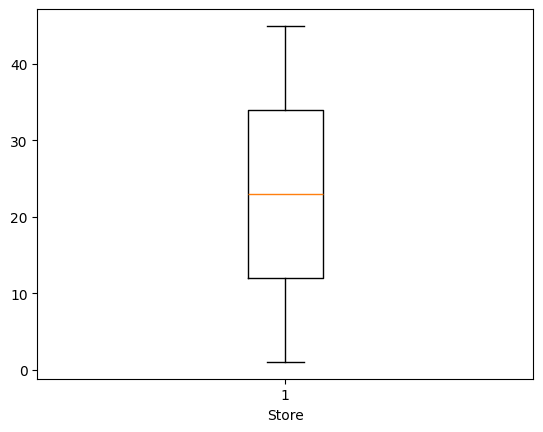

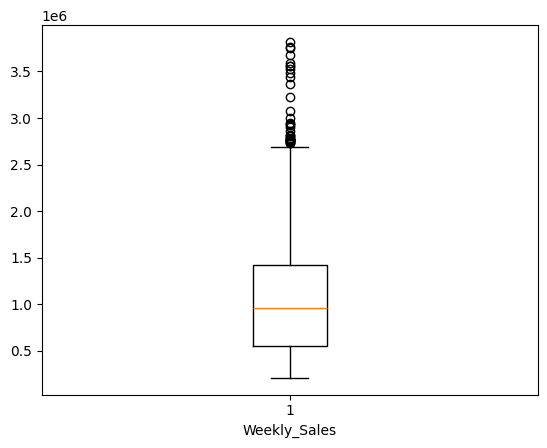

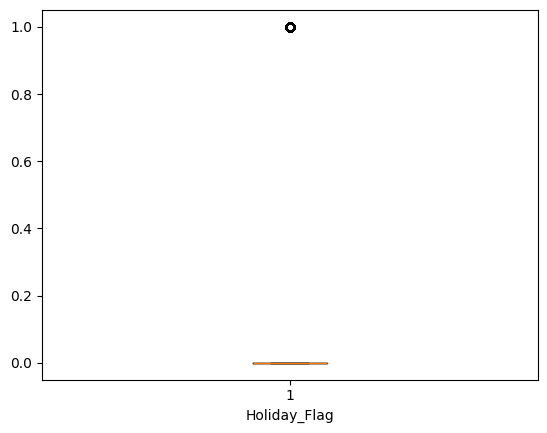

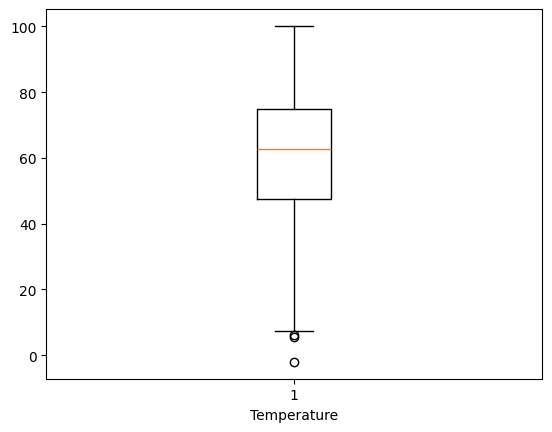

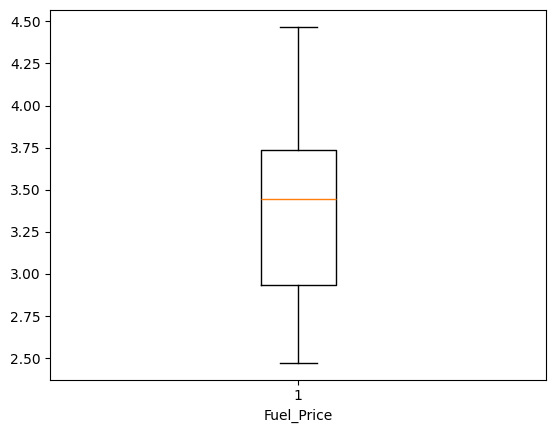

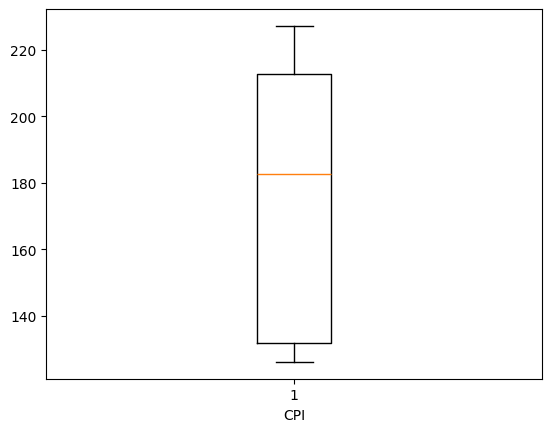

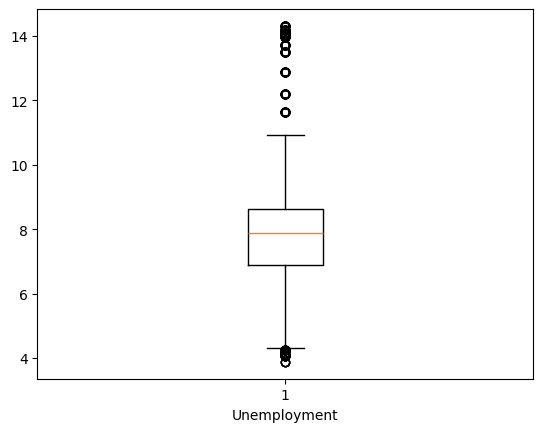

In [17]:
for i in df.columns:
  if (df[i].dtypes=="int64" or df[i].dtypes=="float64"):  #df[i].dtypes=="int64" or df[i].dtypes=="float64"
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [19]:
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), lower_bound, upper_bound , 

for i in df.columns:
    print(i,calculate_outliers(df[i]))

Store (0, np.float64(-21.0), np.float64(67.0))
Date (0, Timestamp('2008-09-12 00:00:00'), Timestamp('2014-03-21 00:00:00'))
Weekly_Sales (34, np.float64(-746862.7275), np.float64(2720371.4924999997))
Holiday_Flag (450, np.float64(0.0), np.float64(0.0))
Temperature (3, np.float64(6.240000000000002), np.float64(116.16))
Fuel_Price (0, np.float64(1.7299999999999998), np.float64(4.938))
CPI (0, np.float64(10.222559825000019), np.float64(334.255733625))
Unemployment (481, np.float64(4.2945), np.float64(11.218499999999999))


In this dataset we will ignore 

holiday-flag

unemploymemnt rate

 1. You are provided with the weekly sales data for their various outlets. Use statistical
 analysis, EDA, outlier analysis, and handle the missing values to come up with various
 insights that can give them a clear perspective on the following:
 - If the weekly sales are affected by the unemployment rate, if yes - which stores
 are suffering the most?

We are making the scatter plot for this analysts

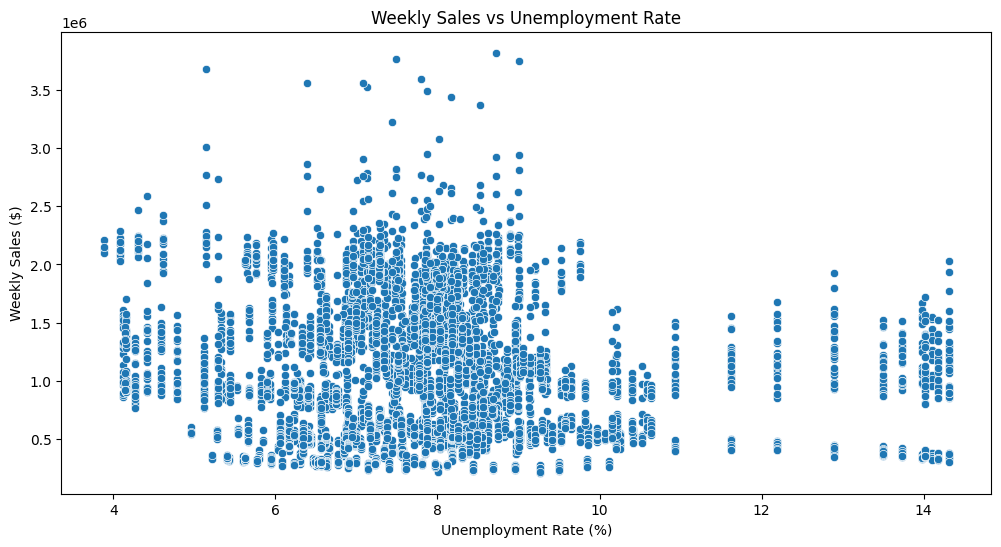

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title('Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales ($)')
plt.show()
plt.close()

We will also calculate coorelation between the two variables

In [23]:
# Calculate correlation
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"\nCorrelation between Unemployment and Sales: {correlation:.3f}")


Correlation between Unemployment and Sales: -0.106


In [29]:
store_unemployment_impact = df.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['Unemployment'])
).sort_values()

print("\nTop 20 Stores most affected by unemployment (negative correlation):")
print(store_unemployment_impact.head(20))



Top 20 Stores most affected by unemployment (negative correlation):
Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
43   -0.201954
9    -0.191534
13   -0.171633
7    -0.165382
40   -0.112528
32   -0.099455
1    -0.097955
20   -0.095341
23   -0.077169
16   -0.070864
dtype: float64


C:\Users\dhruv\AppData\Local\Temp\ipykernel_7720\1208093209.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_unemployment_impact = df.groupby('Store').apply(



- If the weekly sales show a seasonal trend, when and what could be the reason

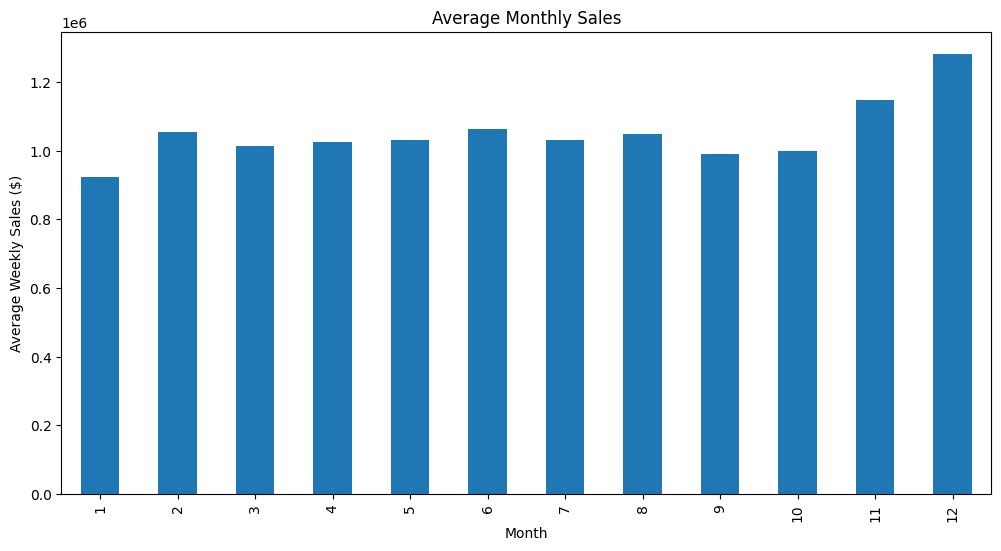

In [31]:
# Add month and year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Monthly average sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.show('seasonal_trends.png')
plt.close()


In [32]:
# Analyze peak and low seasons
print("\nPeak and Low Seasons Analysis:")
print("Peak months (highest sales):")
print(monthly_sales.nlargest(3))
print("\nLow months (lowest sales):")
print(monthly_sales.nsmallest(3))


Peak and Low Seasons Analysis:
Peak months (highest sales):
Month
12    1.281864e+06
11    1.147266e+06
6     1.064325e+06
Name: Weekly_Sales, dtype: float64

Low months (lowest sales):
Month
1     923884.551361
9     989335.349162
10    999632.115538
Name: Weekly_Sales, dtype: float64


In [34]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


### Peak Sales Months Analysis

#### December (Month 12) - Highest Sales Peak
**Primary Reasons:**
- Christmas shopping season
- Holiday gift purchases
- End-of-year sales and promotions
- Winter seasonal items
- Year-end bonuses increasing consumer spending
- Holiday decorations and supplies

#### November (Month 11) - Second Highest Peak
**Key Factors:**
- Thanksgiving holiday shopping
- Winter clothing purchases
- Holiday meal preparations

#### June (Month 6) - Mid-Year Peak
**Contributing Factors:**
- Summer season beginning
- Summer clothing and accessories
- Back-to-school early shopping
- Summer vacation preparations

- Does temperature affect the weekly sales in any manner?

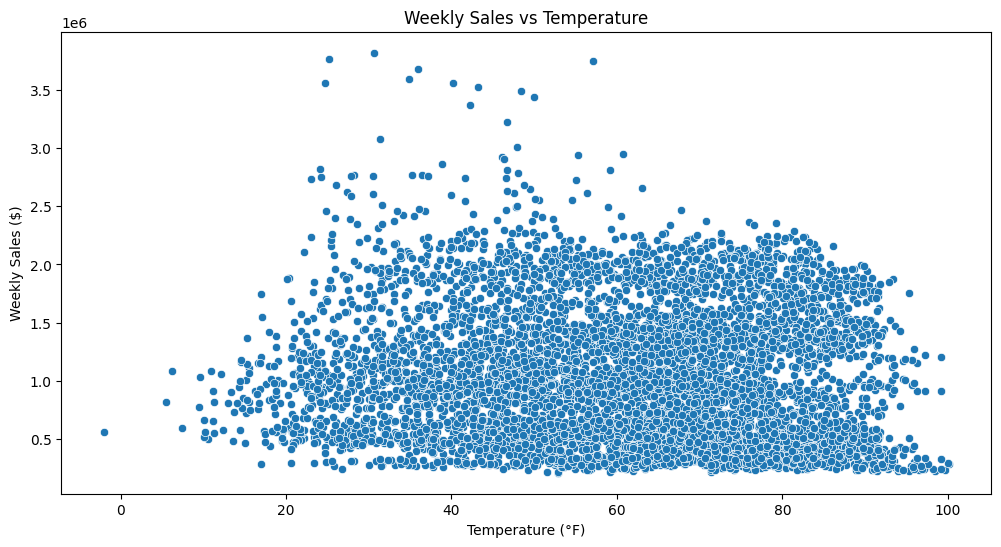


Correlation between Temperature and Sales: -0.064

Sales by Temperature Range:
Temp_Range
(-2.061, 47.46]    1.092913e+06
(47.46, 62.67]     1.050522e+06
(62.67, 74.94]     1.054987e+06
(74.94, 100.14]    9.894422e+05
Name: Weekly_Sales, dtype: float64


C:\Users\dhruv\AppData\Local\Temp\ipykernel_7720\2465976939.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_range_sales = df.groupby('Temp_Range')['Weekly_Sales'].mean()


In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')
plt.show()
plt.close()

# Calculate correlation
correlation = df['Weekly_Sales'].corr(df['Temperature'])
print(f"\nCorrelation between Temperature and Sales: {correlation:.3f}")

# Analyze temperature ranges impact
df['Temp_Range'] = pd.qcut(df['Temperature'], q=4)
temp_range_sales = df.groupby('Temp_Range')['Weekly_Sales'].mean()

print("\nSales by Temperature Range:")
print(temp_range_sales)


##### As  temperature and sales shows weak negeive corelaion this means that increase in temperature does have an impact in the sales but have very less impact overall 
